# Metis EDA Project Code

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
MTA_engine = create_engine('sqlite:///mta_data.db')
MTA_engine.table_names()

/var/folders/c3/70y7ct457z7_9cv9bcgyx8sc0000gn/T/ipykernel_12220/3593746557.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  MTA_engine.table_names()


['mta_data']

__Here is an initial exploration of the data. Making sure there are no NaN or any other irregularity__

In [3]:
MTA_df = pd.read_sql('SELECT * FROM mta_data;',MTA_engine)
MTA_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163


In [4]:
x = pd.to_datetime(MTA_df['DATE'] + ' ' + MTA_df['TIME'])
MTA_df['DATE_TIME'] = x
MTA_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954,2022-01-22 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00


In [5]:
MTA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732019 entries, 0 to 2732018
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 250.1+ MB


In [6]:
MTA_df.shape

(2732019, 12)

In [7]:
MTA_df.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2732014,False,False,False,False,False,False,False,False,False,False,False,False
2732015,False,False,False,False,False,False,False,False,False,False,False,False
2732016,False,False,False,False,False,False,False,False,False,False,False,False
2732017,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Sanity check to make sure there are no spaces in the column titles.
MTA_df.columns = [columns.strip() for columns in MTA_df.columns]
MTA_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [9]:
MTA_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954,2022-01-22 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00


In [10]:
# Getting rid of duplicates using MTA exercise 1 code
MTA_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
MTA_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [11]:
MTA_daily = (MTA_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False).ENTRIES.first())

__Setting up the database so it can be easier to obtain foot traffic information.__
Using techniques and code from the MTA exercises 1 and 2

In [12]:
# Groupby idea was obtained from Metis MTA exercise 1 code
MTA_daily[["PREV_DATE", "PREV_ENTRIES"]] = (MTA_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))
MTA_daily


/var/folders/c3/70y7ct457z7_9cv9bcgyx8sc0000gn/T/ipykernel_12220/707785831.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MTA_daily[["PREV_DATE", "PREV_ENTRIES"]] = (MTA_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,03:00:00,7675872,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/01/2022,07:00:00,7675876,01/01/2022,7675872.0
2,A002,R051,02-00-00,59 ST,01/01/2022,11:00:00,7675887,01/01/2022,7675876.0
3,A002,R051,02-00-00,59 ST,01/01/2022,15:00:00,7675895,01/01/2022,7675887.0
4,A002,R051,02-00-00,59 ST,01/01/2022,19:00:00,7675920,01/01/2022,7675895.0
...,...,...,...,...,...,...,...,...,...
2731990,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,04:00:00,5562,12/31/2021,5562.0
2731991,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,08:00:00,5562,12/31/2021,5562.0
2731992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,12:00:00,5562,12/31/2021,5562.0
2731993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,16:00:00,5562,12/31/2021,5562.0


In [13]:
MTA_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
MTA_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,01/01/2022,07:00:00,7675876,01/01/2022,7675872.0
2,A002,R051,02-00-00,59 ST,01/01/2022,11:00:00,7675887,01/01/2022,7675876.0
3,A002,R051,02-00-00,59 ST,01/01/2022,15:00:00,7675895,01/01/2022,7675887.0
4,A002,R051,02-00-00,59 ST,01/01/2022,19:00:00,7675920,01/01/2022,7675895.0
5,A002,R051,02-00-00,59 ST,01/01/2022,23:00:00,7675936,01/01/2022,7675920.0
...,...,...,...,...,...,...,...,...,...
2731990,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,04:00:00,5562,12/31/2021,5562.0
2731991,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,08:00:00,5562,12/31/2021,5562.0
2731992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,12:00:00,5562,12/31/2021,5562.0
2731993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,16:00:00,5562,12/31/2021,5562.0


In [14]:
# Code from MTA exercise 2 solutions, used for now to deal with reverse entries. 
# Idea of using daily_entries as a metric for foot traffic was obtained from Metis MTA exercises 2
def get_daily_entry(row,max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
    
MTA_daily["DAILY_ENTRIES"] = MTA_daily.apply(get_daily_entry, axis=1,max_counter = 1000000)

In [15]:
MTA_daily

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/01/2022,07:00:00,7675876,01/01/2022,7675872.0,4.0
2,A002,R051,02-00-00,59 ST,01/01/2022,11:00:00,7675887,01/01/2022,7675876.0,11.0
3,A002,R051,02-00-00,59 ST,01/01/2022,15:00:00,7675895,01/01/2022,7675887.0,8.0
4,A002,R051,02-00-00,59 ST,01/01/2022,19:00:00,7675920,01/01/2022,7675895.0,25.0
5,A002,R051,02-00-00,59 ST,01/01/2022,23:00:00,7675936,01/01/2022,7675920.0,16.0
...,...,...,...,...,...,...,...,...,...,...
2731990,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,04:00:00,5562,12/31/2021,5562.0,0.0
2731991,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,08:00:00,5562,12/31/2021,5562.0,0.0
2731992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,12:00:00,5562,12/31/2021,5562.0,0.0
2731993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,16:00:00,5562,12/31/2021,5562.0,0.0


In [16]:
station_entry = MTA_daily.groupby(["STATION", "DATE","TIME"])[['DAILY_ENTRIES']].sum().reset_index()

In [17]:
station_entry.head()
station_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386037 entries, 0 to 386036
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   STATION        386037 non-null  object 
 1   DATE           386037 non-null  object 
 2   TIME           386037 non-null  object 
 3   DAILY_ENTRIES  386037 non-null  float64
dtypes: float64(1), object(3)
memory usage: 11.8+ MB


In [18]:
# Getting the mean to standardize entry data.
station_mean = station_entry.groupby(['STATION']).DAILY_ENTRIES.mean().reset_index()
station_mean.head()

,STATION,DAILY_ENTRIES
0,1 AV,2729.566553
1,103 ST,4646.472072
2,103 ST-CORONA,3410.897436
3,104 ST,649.866300
4,110 ST,1460.053114


In [19]:
means = station_mean.sort_values('DAILY_ENTRIES',ascending = False).head(15)
means

,STATION,DAILY_ENTRIES
59,34 ST-HERALD SQ,12015.232852
352,TIMES SQ-42 ST,10434.289753
86,59 ST COLUMBUS,9459.578571
14,14 ST-UNION SQ,9331.098039
257,JKSN HT-ROOSVLT,9080.338182
217,FLUSHING-MAIN,8219.871377
85,59 ST,7565.283662
61,34 ST-PENN STA,7402.281739
78,50 ST,6634.996370
72,47-50 STS ROCK,5669.187614


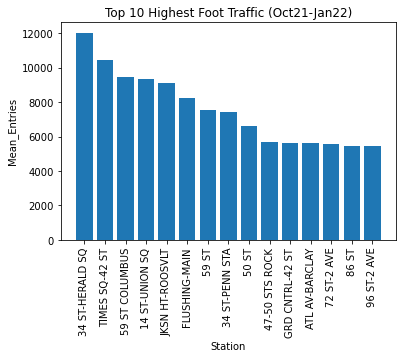

In [66]:
# Method of plotting bar graphs were obtained using matplotlib documentation
# Visualizing the data to see if there are any anomalies
plt.bar(means['STATION'],means['DAILY_ENTRIES'])
plt.xticks(range(len(means['STATION'])), means['STATION'], rotation='vertical')
plt.title('Top 10 Highest Foot Traffic (Oct21-Jan22)')
plt.xlabel('Station')
plt.ylabel('Mean_Entries')
plt.show()

In [21]:
station_entry['DATE'] = pd.to_datetime(station_entry.DATE)
station_entry

,STATION,DATE,TIME,DAILY_ENTRIES
0,1 AV,2022-01-01,07:00:00,139.0
1,1 AV,2022-01-01,11:00:00,298.0
2,1 AV,2022-01-01,15:00:00,670.0
3,1 AV,2022-01-01,19:00:00,897.0
4,1 AV,2022-01-01,23:00:00,548.0
...,...,...,...,...
386032,ZEREGA AV,2021-12-31,04:00:00,9.0
386033,ZEREGA AV,2021-12-31,08:00:00,132.0
386034,ZEREGA AV,2021-12-31,12:00:00,173.0
386035,ZEREGA AV,2021-12-31,16:00:00,150.0


In [22]:
station_entry['DAY_OF_WEEK'] = station_entry['DATE'].dt.weekday
station_entry.head()

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
0,1 AV,2022-01-01,07:00:00,139.0,5
1,1 AV,2022-01-01,11:00:00,298.0,5
2,1 AV,2022-01-01,15:00:00,670.0,5
3,1 AV,2022-01-01,19:00:00,897.0,5
4,1 AV,2022-01-01,23:00:00,548.0,5


In [23]:
# Anomaly in the data
weekly_mean = station_entry.groupby('DAY_OF_WEEK').sum().reset_index()
weekly_mean

,DAY_OF_WEEK,DAILY_ENTRIES
0,0,34191562.0
1,1,39803767.0
2,2,34946265.0
3,3,36157536.0
4,4,34306896.0
5,5,221043859.0
6,6,17295154.0


<BarContainer object of 7 artists>

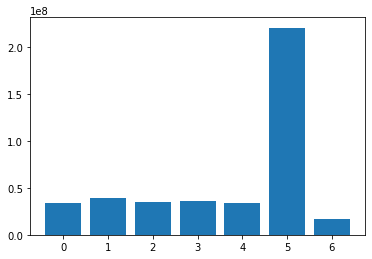

In [24]:
plt.bar(weekly_mean['DAY_OF_WEEK'],weekly_mean['DAILY_ENTRIES'])

In [25]:
station_entry['DAILY_ENTRIES'].argmax()

42961

In [26]:
station_entry.loc[5516]

STATION                       121 ST
DATE             2021-12-29 00:00:00
TIME                        23:00:00
DAILY_ENTRIES                   79.0
DAY_OF_WEEK                        2
Name: 5516, dtype: object

In [27]:
station_entry_penn = station_entry[station_entry['STATION'] == '34 ST-PENN STA']
station_entry_penn

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
43883,34 ST-PENN STA,2022-01-01,05:00:00,385.0,5
43884,34 ST-PENN STA,2022-01-01,07:00:00,489.0,5
43885,34 ST-PENN STA,2022-01-01,09:00:00,450.0,5
43886,34 ST-PENN STA,2022-01-01,11:00:00,1464.0,5
43887,34 ST-PENN STA,2022-01-01,13:00:00,1167.0,5
...,...,...,...,...,...
45028,34 ST-PENN STA,2021-12-31,15:00:00,6303.0,4
45029,34 ST-PENN STA,2021-12-31,17:00:00,3071.0,4
45030,34 ST-PENN STA,2021-12-31,19:00:00,7316.0,4
45031,34 ST-PENN STA,2021-12-31,21:00:00,2401.0,4


In [28]:
# Found out the beginning cause of the anomaly
# Discovered that data included dates before Nov 1st 2021
station_entry_penn.sort_values('DAILY_ENTRIES', ascending = False)

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
44226,34 ST-PENN STA,2021-10-30,00:00:00,2930841.0,5
44227,34 ST-PENN STA,2021-10-30,02:00:00,1327030.0,5
44469,34 ST-PENN STA,2021-11-16,11:00:00,14978.0,1
44732,34 ST-PENN STA,2021-12-07,11:00:00,14902.0,1
44648,34 ST-PENN STA,2021-11-30,11:00:00,14745.0,1
...,...,...,...,...,...
44621,34 ST-PENN STA,2021-11-28,12:04:55,0.0,6
44624,34 ST-PENN STA,2021-11-28,12:08:56,0.0,6
44623,34 ST-PENN STA,2021-11-28,12:07:35,0.0,6
44617,34 ST-PENN STA,2021-11-28,11:59:37,0.0,6


In [29]:
# Discovered that this anomaly occurs throughout the entirety of 2021-10-30 luckily we are only looking at data after Nov 1st

station_entry.sort_values('DAILY_ENTRIES', ascending = False).head()

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
42961,34 ST-HERALD SQ,2021-10-30,00:00:00,3329728.0,5
44226,34 ST-PENN STA,2021-10-30,00:00:00,2930841.0,5
366337,TIMES SQ-42 ST,2021-10-30,00:00:00,2845712.0,5
10084,14 ST-UNION SQ,2021-10-30,01:00:00,2521572.0,5
207043,JKSN HT-ROOSVLT,2021-10-30,00:00:00,2448418.0,5


In [30]:
# This new dataframe only includes dates after nov 1st
station_entry_new = station_entry[station_entry['DATE'] >= '2021-11-01']
station_entry_new

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
0,1 AV,2022-01-01,07:00:00,139.0,5
1,1 AV,2022-01-01,11:00:00,298.0,5
2,1 AV,2022-01-01,15:00:00,670.0,5
3,1 AV,2022-01-01,19:00:00,897.0,5
4,1 AV,2022-01-01,23:00:00,548.0,5
...,...,...,...,...,...
386032,ZEREGA AV,2021-12-31,04:00:00,9.0,4
386033,ZEREGA AV,2021-12-31,08:00:00,132.0,4
386034,ZEREGA AV,2021-12-31,12:00:00,173.0,4
386035,ZEREGA AV,2021-12-31,16:00:00,150.0,4


__From here we confirm that weekdays have higher traffic this means that tents do not need to be released as much during these days__

In [31]:
# New weekly sums 
new_weekly_sum = station_entry_new.groupby('DAY_OF_WEEK').sum().reset_index()
new_weekly_sum

,DAY_OF_WEEK,DAILY_ENTRIES
0,0,34191562.0
1,1,39803767.0
2,2,34946265.0
3,3,36157536.0
4,4,34306896.0
5,5,23904883.0
6,6,15359065.0


Text(0, 0.5, 'Entries (millions)')

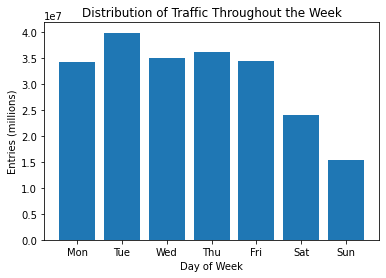

In [32]:
# Code for changing the name of the xticks was obtained from Metis MTA exercises.
plt.bar(new_weekly_sum['DAY_OF_WEEK'],new_weekly_sum['DAILY_ENTRIES'])
plt.xticks(np.arange(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Distribution of Traffic Throughout the Week')
plt.xlabel('Day of Week')
plt.ylabel('Entries (millions)')

In [33]:
station_weeks = station_entry_new.sort_values(['DAILY_ENTRIES'], ascending = False).groupby(['STATION','DAY_OF_WEEK']).sum().reset_index().head(20)
station_weeks

,STATION,DAY_OF_WEEK,DAILY_ENTRIES
0,1 AV,0,227205.0
1,1 AV,1,113483.0
2,1 AV,2,116612.0
3,1 AV,3,108567.0
4,1 AV,4,107943.0
5,1 AV,5,67657.0
6,1 AV,6,60683.0
7,103 ST,0,169211.0
8,103 ST,1,180804.0
9,103 ST,2,185258.0


In [34]:
station_weeks.sort_values('DAILY_ENTRIES', ascending = False)

,STATION,DAY_OF_WEEK,DAILY_ENTRIES
12,103 ST,5,421337.0
0,1 AV,0,227205.0
9,103 ST,2,185258.0
8,103 ST,1,180804.0
10,103 ST,3,173348.0
7,103 ST,0,169211.0
11,103 ST,4,168633.0
16,103 ST-CORONA,2,153829.0
17,103 ST-CORONA,3,147468.0
15,103 ST-CORONA,1,146728.0


In [35]:
# Discovered that most of the traffic is during the weekday 
station_entry_weekday = station_entry_new[station_entry_new['DAY_OF_WEEK'] < 5]

In [36]:
station_entry_weekday

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
11,1 AV,2022-01-03,03:00:00,189.0,0
12,1 AV,2022-01-03,07:00:00,169.0,0
13,1 AV,2022-01-03,11:00:00,1243.0,0
14,1 AV,2022-01-03,15:00:00,1749.0,0
15,1 AV,2022-01-03,19:00:00,2694.0,0
...,...,...,...,...,...
386032,ZEREGA AV,2021-12-31,04:00:00,9.0,4
386033,ZEREGA AV,2021-12-31,08:00:00,132.0,4
386034,ZEREGA AV,2021-12-31,12:00:00,173.0,4
386035,ZEREGA AV,2021-12-31,16:00:00,150.0,4


In [37]:
# Top 5 stations 
station_sum_new = station_entry_weekday.groupby(['STATION']).DAILY_ENTRIES.sum().reset_index()
station_sum_new.sort_values('DAILY_ENTRIES', ascending = False)

,STATION,DAILY_ENTRIES
314,PATH NEW WTC,3754106.0
61,34 ST-PENN STA,3415426.0
351,THIRTY THIRD ST,3316128.0
258,JOURNAL SQUARE,3229179.0
226,FULTON ST,2840857.0
...,...,...
147,BEACH 90 ST,22704.0
332,ROCKAWAY PARK B,21046.0
148,BEACH 98 ST,13712.0
162,BROAD CHANNEL,9270.0


In [38]:
sorted_station = station_sum_new.sort_values('DAILY_ENTRIES', ascending = False).head(10)
sorted_station

,STATION,DAILY_ENTRIES
314,PATH NEW WTC,3754106.0
61,34 ST-PENN STA,3415426.0
351,THIRTY THIRD ST,3316128.0
258,JOURNAL SQUARE,3229179.0
226,FULTON ST,2840857.0
233,GRD CNTRL-42 ST,2697574.0
316,PAVONIA/NEWPORT,2667767.0
59,34 ST-HERALD SQ,2628440.0
110,86 ST,2577370.0
46,23 ST,2380942.0


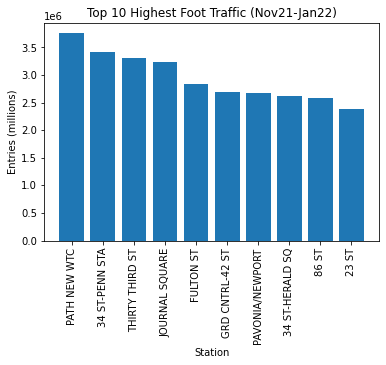

In [39]:
# 
plt.bar(sorted_station['STATION'],sorted_station['DAILY_ENTRIES'])
plt.xticks(range(len(sorted_station['STATION'])), sorted_station['STATION'], rotation='vertical')
plt.title('Top 10 Highest Foot Traffic (Nov21-Jan22)')
plt.xlabel('Station')
plt.ylabel('Entries (millions)')
plt.show()

Will focus on these stations during the weekday to discuss placement of covid testing tents 

In [40]:
station_entry_weekday['TIME'] = pd.to_datetime(station_entry_weekday.TIME)

/var/folders/c3/70y7ct457z7_9cv9bcgyx8sc0000gn/T/ipykernel_12220/620304577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_entry_weekday['TIME'] = pd.to_datetime(station_entry_weekday.TIME)


In [41]:
# Next focus is differentiating time periods, which rush hour time would see the most traffic 
sorted_station_time = station_entry_weekday.groupby(['STATION','TIME'])['DAILY_ENTRIES'].sum().reset_index()
sorted_station_time.head(30)

,STATION,TIME,DAILY_ENTRIES
0,1 AV,2022-07-12 00:00:00,6164.0
1,1 AV,2022-07-12 03:00:00,18219.0
2,1 AV,2022-07-12 04:00:00,1075.0
3,1 AV,2022-07-12 07:00:00,125395.0
4,1 AV,2022-07-12 07:47:30,234.0
5,1 AV,2022-07-12 08:00:00,3703.0
6,1 AV,2022-07-12 08:41:27,307.0
7,1 AV,2022-07-12 08:43:02,118.0
8,1 AV,2022-07-12 11:00:00,93141.0
9,1 AV,2022-07-12 11:22:05,56.0


In [42]:
sorted_PM = sorted_station_time[sorted_station_time['TIME'] > '12:00:00']
sorted_PM

,STATION,TIME,DAILY_ENTRIES
12,1 AV,2022-07-12 13:09:58,226.0
13,1 AV,2022-07-12 15:00:00,111756.0
14,1 AV,2022-07-12 15:47:27,281.0
15,1 AV,2022-07-12 16:00:00,20707.0
16,1 AV,2022-07-12 19:00:00,189899.0
...,...,...,...
68143,ZEREGA AV,2022-07-12 13:00:00,1187.0
68144,ZEREGA AV,2022-07-12 16:00:00,14759.0
68145,ZEREGA AV,2022-07-12 17:00:00,1555.0
68146,ZEREGA AV,2022-07-12 20:00:00,12036.0


In [43]:
sorted_PM_TIME = sorted_PM.groupby('TIME')['DAILY_ENTRIES'].mean().reset_index()
sorted_PM_TIME_TOP = sorted_PM_TIME.sort_values('DAILY_ENTRIES', ascending = False).head(10)
sorted_PM_TIME_TOP.sort_values('TIME')

,TIME,DAILY_ENTRIES
168,2022-07-12 12:05:13,156922.000000
3563,2022-07-12 13:51:25,181756.000000
3893,2022-07-12 14:02:13,250902.000000
4372,2022-07-12 14:18:17,387086.000000
5444,2022-07-12 14:53:40,248498.500000
6367,2022-07-12 15:24:09,299924.000000
11914,2022-07-12 18:16:17,246882.000000
14568,2022-07-12 19:43:44,234428.500000
14632,2022-07-12 19:45:57,230223.333333
18764,2022-07-12 21:54:36,326274.000000


In [44]:
#Finding PM time block, there must be a function you can create to do this for you...
sorted_PM_PATH = sorted_PM[sorted_PM['STATION'] == 'PATH NEW WTC']
sorted_PM_PENN = sorted_PM[sorted_PM['STATION'] == '34 ST-PENN STA']
sorted_PM_33 = sorted_PM[sorted_PM['STATION'] == 'THIRTY THIRD ST']
sorted_PM_JOURNAL = sorted_PM[sorted_PM['STATION'] == 'JOURNAL SQUARE']
sorted_PM_FULTON = sorted_PM[sorted_PM['STATION'] == 'FULTON ST']
sorted_PM_PAVNEW = sorted_PM[sorted_PM['STATION'] == 'PAVONIA/NEWPORT']
sorted_PM_GRDCEN = sorted_PM[sorted_PM['STATION'] == 'GRD CNTRL-42 ST']
sorted_PM_HER = sorted_PM[sorted_PM['STATION'] == '34 ST-HERALD SQ']
sorted_PM_86 = sorted_PM[sorted_PM['STATION'] == '86 ST']
sorted_PM_TIME = sorted_PM[sorted_PM['STATION'] == 'TIMES SQ-42 ST']

In [45]:
sorted_PM_TOP = [sorted_PM_PATH['DAILY_ENTRIES'].sum(),
sorted_PM_PENN['DAILY_ENTRIES'].sum(),
sorted_PM_33['DAILY_ENTRIES'].sum(),
sorted_PM_JOURNAL['DAILY_ENTRIES'].sum(),
sorted_PM_FULTON['DAILY_ENTRIES'].sum(),
sorted_PM_PAVNEW['DAILY_ENTRIES'].sum(),
sorted_PM_GRDCEN['DAILY_ENTRIES'].sum(),
sorted_PM_HER['DAILY_ENTRIES'].sum(),
sorted_PM_86['DAILY_ENTRIES'].sum(),
sorted_PM_TIME['DAILY_ENTRIES'].sum()]
sorted_PM_TOP


[2781419.0,
 2054067.0,
 3031916.0,
 845919.0,
 1395221.0,
 1688059.0,
 1813112.0,
 2019315.0,
 1676769.0,
 1892727.0]

In [46]:
stations_PM = {'STATION': sorted_station['STATION'],
              'PM_ENTRIES':sorted_PM_TOP}
stations_PM_df = pd.DataFrame(stations_PM)
stations_PM_df

,STATION,PM_ENTRIES
314,PATH NEW WTC,2781419.0
61,34 ST-PENN STA,2054067.0
351,THIRTY THIRD ST,3031916.0
258,JOURNAL SQUARE,845919.0
226,FULTON ST,1395221.0
233,GRD CNTRL-42 ST,1688059.0
316,PAVONIA/NEWPORT,1813112.0
59,34 ST-HERALD SQ,2019315.0
110,86 ST,1676769.0
46,23 ST,1892727.0


In [47]:
sorted_AM = sorted_station_time[sorted_station_time['TIME'] < '12:00:00']
sorted_AM.head(12)

,STATION,TIME,DAILY_ENTRIES
0,1 AV,2022-07-12 00:00:00,6164.0
1,1 AV,2022-07-12 03:00:00,18219.0
2,1 AV,2022-07-12 04:00:00,1075.0
3,1 AV,2022-07-12 07:00:00,125395.0
4,1 AV,2022-07-12 07:47:30,234.0
5,1 AV,2022-07-12 08:00:00,3703.0
6,1 AV,2022-07-12 08:41:27,307.0
7,1 AV,2022-07-12 08:43:02,118.0
8,1 AV,2022-07-12 11:00:00,93141.0
9,1 AV,2022-07-12 11:22:05,56.0


In [48]:
# Getting AM time block sum.
sorted_AM_PATH = sorted_AM[sorted_AM['STATION'] == 'PATH NEW WTC']
sorted_AM_PENN = sorted_AM[sorted_AM['STATION'] == '34 ST-PENN STA']
sorted_AM_33 = sorted_AM[sorted_AM['STATION'] == 'THIRTY THIRD ST']
sorted_AM_JOURNAL = sorted_AM[sorted_AM['STATION'] == 'JOURNAL SQUARE']
sorted_AM_FULTON = sorted_AM[sorted_AM['STATION'] == 'FULTON ST']
sorted_AM_PAVNEW = sorted_AM[sorted_AM['STATION'] == 'PAVONIA/NEWPORT']
sorted_AM_GRDCEN = sorted_AM[sorted_AM['STATION'] == 'GRD CNTRL-42 ST']
sorted_AM_HER = sorted_AM[sorted_AM['STATION'] == '34 ST-HERALD SQ']
sorted_AM_86 = sorted_AM[sorted_AM['STATION'] == '86 ST']
sorted_AM_TIME = sorted_AM[sorted_AM['STATION'] == 'TIMES SQ-42 ST']

In [49]:
sorted_AM_TOP = [sorted_AM_PATH['DAILY_ENTRIES'].sum(),
sorted_AM_PENN['DAILY_ENTRIES'].sum(),
sorted_AM_33['DAILY_ENTRIES'].sum(),
sorted_AM_JOURNAL['DAILY_ENTRIES'].sum(),
sorted_AM_FULTON['DAILY_ENTRIES'].sum(),
sorted_AM_PAVNEW['DAILY_ENTRIES'].sum(),
sorted_AM_GRDCEN['DAILY_ENTRIES'].sum(),
sorted_AM_HER['DAILY_ENTRIES'].sum(),
sorted_AM_86['DAILY_ENTRIES'].sum(),
sorted_AM_TIME['DAILY_ENTRIES'].sum()]
sorted_AM_TOP

[972687.0,
 1310861.0,
 284212.0,
 2383260.0,
 1245151.0,
 979708.0,
 625110.0,
 572992.0,
 748558.0,
 463570.0]

In [50]:
stations_AM = {'STATION': sorted_station['STATION'],
              'AM_ENTRIES':sorted_AM_TOP,
              'PM_ENTRIES':sorted_PM_TOP}
stations_AMPM_df = pd.DataFrame(stations_AM)
stations_AMPM_df

,STATION,AM_ENTRIES,PM_ENTRIES
314,PATH NEW WTC,972687.0,2781419.0
61,34 ST-PENN STA,1310861.0,2054067.0
351,THIRTY THIRD ST,284212.0,3031916.0
258,JOURNAL SQUARE,2383260.0,845919.0
226,FULTON ST,1245151.0,1395221.0
233,GRD CNTRL-42 ST,979708.0,1688059.0
316,PAVONIA/NEWPORT,625110.0,1813112.0
59,34 ST-HERALD SQ,572992.0,2019315.0
110,86 ST,748558.0,1676769.0
46,23 ST,463570.0,1892727.0


Method for plotting multiple columns using ideas from https://learndataanalysis.org/source-code-plot-grouped-bar-graph-with-python-and-pandas/

Text(0, 0.5, 'ENTRIES (million)')

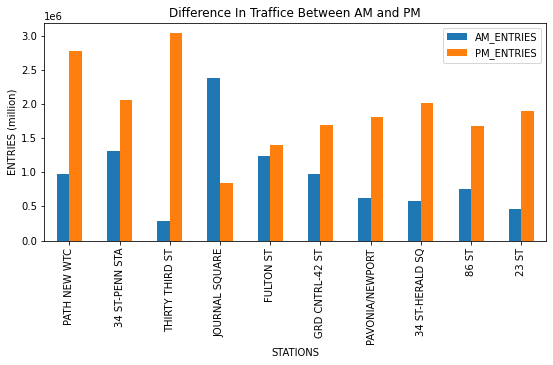

In [51]:
stations_AMPM_df.plot(kind = 'bar', figsize= (9,4))
plt.xticks(range(len(sorted_station['STATION'])), sorted_station['STATION'], rotation='vertical')
plt.title('Difference In Traffice Between AM and PM')
plt.xlabel('STATIONS')
plt.ylabel('ENTRIES (million)')

In [52]:
# Looking at November foot traffic
station_entry_nov = station_entry_new[station_entry_new['DATE'] <= '2021-11-30']
station_entry_nov

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
182,1 AV,2021-11-01,00:00:00,1271.0,0
183,1 AV,2021-11-01,04:00:00,277.0,0
184,1 AV,2021-11-01,08:00:00,781.0,0
185,1 AV,2021-11-01,12:00:00,1787.0,0
186,1 AV,2021-11-01,16:00:00,9638.0,0
...,...,...,...,...,...
385846,ZEREGA AV,2021-11-30,04:00:00,5.0,1
385847,ZEREGA AV,2021-11-30,08:00:00,533.0,1
385848,ZEREGA AV,2021-11-30,12:00:00,337.0,1
385849,ZEREGA AV,2021-11-30,16:00:00,272.0,1


In [53]:
station_entry_nov_top = station_entry_nov.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index()
station_entry_nov_top.sort_values('DAILY_ENTRIES', ascending = False).head(10)

,STATION,DAILY_ENTRIES
351,THIRTY THIRD ST,3718816.0
316,PAVONIA/NEWPORT,2112438.0
350,THIRTY ST,1789755.0
226,FULTON ST,1741387.0
258,JOURNAL SQUARE,1717185.0
61,34 ST-PENN STA,1635044.0
314,PATH NEW WTC,1579652.0
352,TIMES SQ-42 ST,1332852.0
235,GROVE STREET,1317004.0
59,34 ST-HERALD SQ,1240881.0


In [54]:
NOV_PATH = station_entry_nov[station_entry_nov['STATION'] == 'PATH NEW WTC']
NOV_PENN = station_entry_nov[station_entry_nov['STATION'] == '34 ST-PENN STA']
NOV_33 = station_entry_nov[station_entry_nov['STATION'] == 'THIRTY THIRD ST']
NOV_JOURNAL = station_entry_nov[station_entry_nov['STATION'] == 'JOURNAL SQUARE']
NOV_FULTON = station_entry_nov[station_entry_nov['STATION'] == 'FULTON ST']
NOV_PAVNEW = station_entry_nov[station_entry_nov['STATION'] == 'PAVONIA/NEWPORT']
NOV_GRDCEN = station_entry_nov[station_entry_nov['STATION'] == 'GRD CNTRL-42 ST']
NOV_HER = station_entry_nov[station_entry_nov['STATION'] == '34 ST-HERALD SQ']
NOV_86 = station_entry_nov[station_entry_nov['STATION'] == '86 ST']
NOV_TIME = station_entry_nov[station_entry_nov['STATION'] == 'TIMES SQ-42 ST']

In [55]:
NOV_TOP = [NOV_PATH['DAILY_ENTRIES'].sum(),
NOV_PENN['DAILY_ENTRIES'].sum(),
NOV_33['DAILY_ENTRIES'].sum(),
NOV_JOURNAL['DAILY_ENTRIES'].sum(),
NOV_FULTON['DAILY_ENTRIES'].sum(),
NOV_PAVNEW['DAILY_ENTRIES'].sum(),
NOV_GRDCEN['DAILY_ENTRIES'].sum(),
NOV_HER['DAILY_ENTRIES'].sum(),
NOV_86['DAILY_ENTRIES'].sum(),
NOV_TIME['DAILY_ENTRIES'].sum()]

In [56]:
# Looking at December foot traffic
start_date = '2021-12-01'
end_date = '2021-12-31'

mask = (station_entry_new['DATE'] >= start_date) & (station_entry_new['DATE'] <= end_date)
station_entry_dec = station_entry_new.loc[mask]
station_entry_dec

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
365,1 AV,2021-12-01,03:00:00,388.0,2
366,1 AV,2021-12-01,07:00:00,235.0,2
367,1 AV,2021-12-01,11:00:00,2093.0,2
368,1 AV,2021-12-01,15:00:00,2089.0,2
369,1 AV,2021-12-01,19:00:00,3724.0,2
...,...,...,...,...,...
386032,ZEREGA AV,2021-12-31,04:00:00,9.0,4
386033,ZEREGA AV,2021-12-31,08:00:00,132.0,4
386034,ZEREGA AV,2021-12-31,12:00:00,173.0,4
386035,ZEREGA AV,2021-12-31,16:00:00,150.0,4


In [57]:
station_entry_dec_top = station_entry_dec.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index()
station_entry_dec_top.sort_values('DAILY_ENTRIES', ascending = False).head(10)

,STATION,DAILY_ENTRIES
350,THIRTY ST,1850730.0
13,14 ST,1558388.0
61,34 ST-PENN STA,1543450.0
59,34 ST-HERALD SQ,1247167.0
314,PATH NEW WTC,1174619.0
233,GRD CNTRL-42 ST,1151602.0
182,CHRISTOPHER ST,1086496.0
68,42 ST-PORT AUTH,1048775.0
46,23 ST,1038388.0
110,86 ST,1034559.0


In [58]:
DEC_PATH = station_entry_dec[station_entry_dec['STATION'] == 'PATH NEW WTC']
DEC_PENN = station_entry_dec[station_entry_dec['STATION'] == '34 ST-PENN STA']
DEC_33 = station_entry_dec[station_entry_dec['STATION'] == 'THIRTY THIRD ST']
DEC_JOURNAL = station_entry_dec[station_entry_dec['STATION'] == 'JOURNAL SQUARE']
DEC_FULTON = station_entry_dec[station_entry_dec['STATION'] == 'FULTON ST']
DEC_PAVNEW = station_entry_dec[station_entry_dec['STATION'] == 'PAVONIA/NEWPORT']
DEC_GRDCEN = station_entry_dec[station_entry_dec['STATION'] == 'GRD CNTRL-42 ST']
DEC_HER = station_entry_dec[station_entry_dec['STATION'] == '34 ST-HERALD SQ']
DEC_86 = station_entry_dec[station_entry_dec['STATION'] == '86 ST']
DEC_TIME = station_entry_dec[station_entry_dec['STATION'] == 'TIMES SQ-42 ST']

In [59]:
DEC_TOP = [DEC_PATH['DAILY_ENTRIES'].sum(),
DEC_PENN['DAILY_ENTRIES'].sum(),
DEC_33['DAILY_ENTRIES'].sum(),
DEC_JOURNAL['DAILY_ENTRIES'].sum(),
DEC_FULTON['DAILY_ENTRIES'].sum(),
DEC_PAVNEW['DAILY_ENTRIES'].sum(),
DEC_GRDCEN['DAILY_ENTRIES'].sum(),
DEC_HER['DAILY_ENTRIES'].sum(),
DEC_86['DAILY_ENTRIES'].sum(),
DEC_TIME['DAILY_ENTRIES'].sum()]

In [60]:
# Looking at January foot traffic
start_date1 = '2022-01-01'
end_date1 = '2022-01-31'

mask1 = (station_entry_new['DATE'] >= start_date1) & (station_entry_new['DATE'] <= end_date1)
station_entry_jan = station_entry_new.loc[mask1]
station_entry_jan

,STATION,DATE,TIME,DAILY_ENTRIES,DAY_OF_WEEK
0,1 AV,2022-01-01,07:00:00,139.0,5
1,1 AV,2022-01-01,11:00:00,298.0,5
2,1 AV,2022-01-01,15:00:00,670.0,5
3,1 AV,2022-01-01,19:00:00,897.0,5
4,1 AV,2022-01-01,23:00:00,548.0,5
...,...,...,...,...,...
385654,ZEREGA AV,2022-01-28,04:00:00,9.0,4
385655,ZEREGA AV,2022-01-28,08:00:00,461.0,4
385656,ZEREGA AV,2022-01-28,12:00:00,319.0,4
385657,ZEREGA AV,2022-01-28,16:00:00,247.0,4


In [61]:
station_entry_jan_top = station_entry_jan.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index()
station_entry_jan_top.sort_values('DAILY_ENTRIES', ascending = False).head(10)

,STATION,DAILY_ENTRIES
86,59 ST COLUMBUS,1648677.0
116,96 ST-2 AVE,1535382.0
297,NEWARK BM BW,1527523.0
313,PATH NEW WTC,1312932.0
350,THIRTY THIRD ST,1244022.0
257,JOURNAL SQUARE,1206798.0
256,JKSN HT-ROOSVLT,1038522.0
173,CANAL ST,1012553.0
61,34 ST-PENN STA,1012161.0
110,86 ST,792642.0


In [62]:
JAN_PATH = station_entry_jan[station_entry_jan['STATION'] == 'PATH NEW WTC']
JAN_PENN = station_entry_jan[station_entry_jan['STATION'] == '34 ST-PENN STA']
JAN_33 = station_entry_jan[station_entry_jan['STATION'] == 'THIRTY THIRD ST']
JAN_JOURNAL = station_entry_jan[station_entry_jan['STATION'] == 'JOURNAL SQUARE']
JAN_FULTON = station_entry_jan[station_entry_jan['STATION'] == 'FULTON ST']
JAN_PAVNEW = station_entry_jan[station_entry_jan['STATION'] == 'PAVONIA/NEWPORT']
JAN_GRDCEN = station_entry_jan[station_entry_jan['STATION'] == 'GRD CNTRL-42 ST']
JAN_HER = station_entry_jan[station_entry_jan['STATION'] == '34 ST-HERALD SQ']
JAN_86 = station_entry_jan[station_entry_jan['STATION'] == '86 ST']
JAN_TIME = station_entry_jan[station_entry_jan['STATION'] == 'TIMES SQ-42 ST']

In [63]:
JAN_TOP = [JAN_PATH['DAILY_ENTRIES'].sum(),
JAN_PENN['DAILY_ENTRIES'].sum(),
JAN_33['DAILY_ENTRIES'].sum(),
JAN_JOURNAL['DAILY_ENTRIES'].sum(),
JAN_FULTON['DAILY_ENTRIES'].sum(),
JAN_PAVNEW['DAILY_ENTRIES'].sum(),
JAN_GRDCEN['DAILY_ENTRIES'].sum(),
JAN_HER['DAILY_ENTRIES'].sum(),
JAN_86['DAILY_ENTRIES'].sum(),
JAN_TIME['DAILY_ENTRIES'].sum()]
JAN_TOP

[1312932.0,
 1012161.0,
 1244022.0,
 1206798.0,
 617337.0,
 465141.0,
 791729.0,
 788333.0,
 792642.0,
 652742.0]

In [64]:
stations_month = {'STATION': sorted_station['STATION'],
                  'NOV21_ENTRIES':NOV_TOP,
                  'DEC21_ENTRIES':DEC_TOP,
                  'JAN22_ENTRIES':JAN_TOP}
month_df = pd.DataFrame(stations_month)
month_df

,STATION,NOV21_ENTRIES,DEC21_ENTRIES,JAN22_ENTRIES
314,PATH NEW WTC,1579652.0,1174619.0,1312932.0
61,34 ST-PENN STA,1635044.0,1543450.0,1012161.0
351,THIRTY THIRD ST,3718816.0,281991.0,1244022.0
258,JOURNAL SQUARE,1717185.0,572475.0,1206798.0
226,FULTON ST,1741387.0,865930.0,617337.0
233,GRD CNTRL-42 ST,2112438.0,187172.0,465141.0
316,PAVONIA/NEWPORT,1239228.0,1151602.0,791729.0
59,34 ST-HERALD SQ,1240881.0,1247167.0,788333.0
110,86 ST,1216498.0,1034559.0,792642.0
46,23 ST,1332852.0,1031218.0,652742.0


Text(0.5, 0, 'ENTRIES (million)')

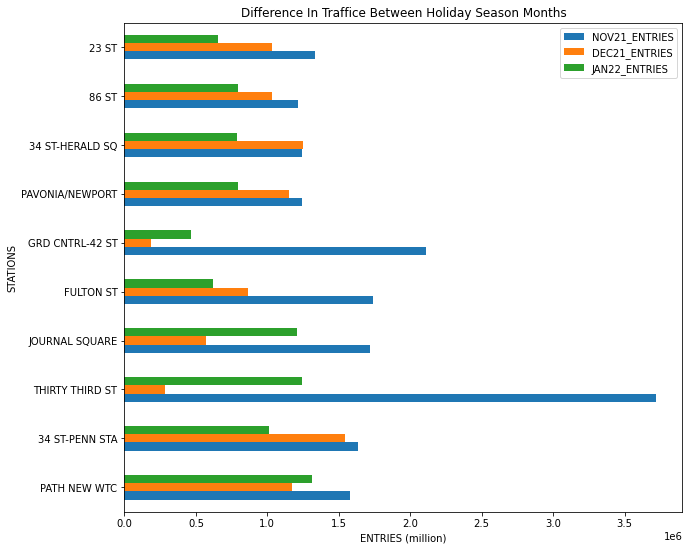

In [65]:
# Comparing the difference in foot traffic betwen months. 
month_df.plot(kind = 'barh', figsize= (10,9))
plt.yticks(range(len(sorted_station['STATION'])), sorted_station['STATION'], rotation='horizontal')
plt.title('Difference In Traffice Between Holiday Season Months')
plt.ylabel('STATIONS')
plt.xlabel('ENTRIES (million)')